In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

# Basic Visualisation of important points

In [5]:
from run_1D import generate_course

In [237]:
game_map = np.atleast_2d(generate_course())

In [185]:
game_map = np.array([
    [0, 0, 10, 0, 0, -5],
    [0, 0, 17, -1, 0, 1],
    [0, -1, 0, 0, 3, 0],
]).transpose()

In [186]:
def position_from_state(game_map, state):
    """State is a scalar index, get position on map"""
    x, y = np.unravel_index(state, game_map.shape)
    print(x, y)
    return x, y

In [187]:
def annotate(game_map, state, txt):
    """Add text to a field on the map"""
    
    x, y = position_from_state(game_map, state)
    
    plt.text(x, y, txt, ha="center", va="center", color="gray", fontdict={"fontweight": "bold", "fontsize": 14})
    

In [204]:
def mark_position(game_map, state, color="blue"):
    """Highlight a field on the map, e.g. to indicate 
    the current position"""
    from matplotlib.patches import Rectangle
    x, y = position_from_state(game_map, state)
    
    plt.gca().add_patch(Rectangle((x-0.5, y-0.5), 1, 1, fill=False, edgecolor=color, lw=3))

In [229]:
def visualize_map(game_map):
    
    plt.imshow(game_map.transpose(), origin="lower")
    cbar = plt.colorbar()
    
    xticks = np.arange(game_map.shape[0])
    yticks = np.arange(game_map.shape[1])
    plt.xticks(xticks, xticks)
    plt.yticks(yticks, yticks)
    
    plt.xlabel("x")
    plt.ylabel("y")
    
    #cbar.set_label("Gain")

In [230]:
def visualize_map_and_landmarks(game_map, start_state):
    
    visualize_map(game_map)
    annotate(game_map, np.argmax(game_map), "Win")
    annotate(game_map, np.argmin(game_map), "Death")
    
    mark_position(game_map, start_state, color="grey")

0 5
0 7
0 0
0 4


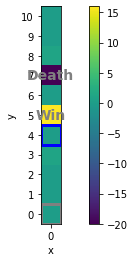

In [238]:

plt.figure(figsize=(10, 4))

visualize_map_and_landmarks(game_map, start_state=0)

#plt.plot(*[[0, 3]]*2, "k-")


mark_position(game_map, 4)

# Animation 

0 5
0 7
0 0
0 0
0 5
0 7
0 0
0 0
0 5
0 7
0 0
0 1
0 5
0 7
0 0
0 2
0 5
0 7
0 0
0 3
0 5
0 7
0 0
0 4
0 5
0 7
0 0
0 5
0 5
0 7
0 0
0 6
0 5
0 7
0 0
0 7
0 5
0 7
0 0
0 8
0 5
0 7
0 0
0 9
0 5
0 7
0 0
0 10
0 5
0 7
0 0
0 0
0 5
0 7
0 0
0 1
0 5
0 7
0 0
0 2
0 5
0 7
0 0
0 3
0 5
0 7
0 0
0 4
0 5
0 7
0 0
0 5
0 5
0 7
0 0
0 6
0 5
0 7
0 0
0 7
0 5
0 7
0 0
0 8


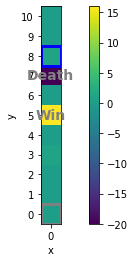

In [239]:
import matplotlib.animation as animation

def init():
    visualize_map_and_landmarks(game_map, start_state=0)
    mark_position(game_map, 0)

def animate(i):
    plt.clf()
    visualize_map_and_landmarks(game_map, start_state=0)
    mark_position(game_map, i % game_map.size)

fig = plt.figure(figsize=(10, 4))

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=20, repeat = False)
anim.save("demo.gif")

In [234]:
game_map

array([[  0,   0,   0,   1,   0,  16,   0, -20,   1,   0,   0]])

In [236]:
np.atleast_2d(generate_course())

array([[  0,   0,   0,   1,   0,  16,   0, -20,   1,   0,   0]])